# Bike-Sharing Dataset

The [Bike-Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset) contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. The dataset contains 14 features with information about the day-type, e.g., month, hour, which day of the week, whether it is working-day, and the weather conditions, e.g., temperature, humidity, wind speed, etc. The target variable is the number of bike rentals per hour. The dataset contains 17,379 instances. 

In [1]:
import effector
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


2025-01-26 19:06:05.339547: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 19:06:05.448704: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 19:06:05.581353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737911165.712627  120183 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737911165.746757  120183 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 19:06:06.001661: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Preprocess the data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing_dataset = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing_dataset.data.features 
y = bike_sharing_dataset.data.targets 
  
# metadata 
# print(bike_sharing_dataset.metadata) 
  
# variable information 
print(bike_sharing_dataset.variables) 

          name     role         type demographic  \
0      instant       ID      Integer        None   
1       dteday  Feature         Date        None   
2       season  Feature  Categorical        None   
3           yr  Feature  Categorical        None   
4         mnth  Feature  Categorical        None   
5           hr  Feature  Categorical        None   
6      holiday  Feature       Binary        None   
7      weekday  Feature  Categorical        None   
8   workingday  Feature       Binary        None   
9   weathersit  Feature  Categorical        None   
10        temp  Feature   Continuous        None   
11       atemp  Feature   Continuous        None   
12         hum  Feature   Continuous        None   
13   windspeed  Feature   Continuous        None   
14      casual    Other      Integer        None   
15  registered    Other      Integer        None   
16         cnt   Target      Integer        None   

                                          description units mis

In [3]:
X = X.drop(["dteday", "atemp"], axis=1)

In [4]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0


In [5]:
# load dataset
# df = pd.read_csv("./../data/Bike-Sharing-Dataset/hour.csv")

# drop columns
# df = df.drop(["instant", "dteday", "casual", "registered", "atemp"], axis=1)

In [6]:
print("Design matrix shape: {}".format(X.shape))
print("---------------------------------")
for col_name in X.columns:
    print("Feature: {:15}, unique: {:4d}, Mean: {:6.2f}, Std: {:6.2f}, Min: {:6.2f}, Max: {:6.2f}".format(col_name, len(X[col_name].unique()), X[col_name].mean(), X[col_name].std(), X[col_name].min(), X[col_name].max()))
    
print("\nTarget shape: {}".format(y.shape))
print("---------------------------------")
for col_name in y.columns:
    print("Target: {:15}, unique: {:4d}, Mean: {:6.2f}, Std: {:6.2f}, Min: {:6.2f}, Max: {:6.2f}".format(col_name, len(y[col_name].unique()), y[col_name].mean(), y[col_name].std(), y[col_name].min(), y[col_name].max()))

Design matrix shape: (17379, 11)
---------------------------------
Feature: season         , unique:    4, Mean:   2.50, Std:   1.11, Min:   1.00, Max:   4.00
Feature: yr             , unique:    2, Mean:   0.50, Std:   0.50, Min:   0.00, Max:   1.00
Feature: mnth           , unique:   12, Mean:   6.54, Std:   3.44, Min:   1.00, Max:  12.00
Feature: hr             , unique:   24, Mean:  11.55, Std:   6.91, Min:   0.00, Max:  23.00
Feature: holiday        , unique:    2, Mean:   0.03, Std:   0.17, Min:   0.00, Max:   1.00
Feature: weekday        , unique:    7, Mean:   3.00, Std:   2.01, Min:   0.00, Max:   6.00
Feature: workingday     , unique:    2, Mean:   0.68, Std:   0.47, Min:   0.00, Max:   1.00
Feature: weathersit     , unique:    4, Mean:   1.43, Std:   0.64, Min:   1.00, Max:   4.00
Feature: temp           , unique:   50, Mean:   0.50, Std:   0.19, Min:   0.02, Max:   1.00
Feature: hum            , unique:   89, Mean:   0.63, Std:   0.19, Min:   0.00, Max:   1.00
Feature: wind

Feature analysis:

| Feature      | Description                              | Value Range                                           |
|--------------|------------------------------------------|-------------------------------------------------------|
| season       | season                                   | 1: winter, 2: spring, 3: summer, 4: fall              |
| yr           | year                                     | 0: 2011, 1: 2012                                      |
| mnth         | month                                    | 1 to 12                                               |
| hr           | hour                                     | 0 to 23                                               |
| holiday      | whether the day is a holiday or not      | 0: no, 1: yes                                         |
| weekday      | day of the week                          | 0: Sunday, 1: Monday, …, 6: Saturday                  |
| workingday   | whether the day is a working day or not  | 0: no, 1: yes                                         |
| weathersit   | weather situation                        | 1: clear, 2: mist, 3: light rain, 4: heavy rain       |
| temp         | temperature                              | values in [0.02, 1.00], with mean: 0.50 and std: 0.19 |
| hum          | humidity                                 | values in [0.00, 1.00], with mean: 0.63 and std: 0.19 |
| windspeed    | wind speed                               | values in [0.00, 0.85], with mean: 0.19 and std: 0.12 |


Target variable:

| Target       | Description                            | Value Range                                          |
|--------------|----------------------------------------|------------------------------------------------------|
| cnt          | bike rentals per hour                  | values in [1, 977] with mean: 189.46 and std: 181.39 |


In [7]:
def preprocess(X, y):
    # Standarize X
    X_df = X
    x_mean = X_df.mean()
    x_std = X_df.std()
    X_df = (X_df - X_df.mean()) / X_df.std()

    # Standarize Y
    Y_df = y
    y_mean = Y_df.mean()
    y_std = Y_df.std()
    Y_df = (Y_df - Y_df.mean()) / Y_df.std()
    return X_df, Y_df, x_mean, x_std, y_mean, y_std

# shuffle and standarize all features
X_df, Y_df, x_mean, x_std, y_mean, y_std = preprocess(X, y)

In [8]:
def split(X_df, Y_df):
    # shuffle indices
    indices = X_df.index.tolist()
    np.random.shuffle(indices)
    
    # data split
    train_size = int(0.8 * len(X_df))
    
    X_train = X_df.iloc[indices[:train_size]]
    Y_train = Y_df.iloc[indices[:train_size]]
    X_test = X_df.iloc[indices[train_size:]]
    Y_test = Y_df.iloc[indices[train_size:]]
    
    return X_train, Y_train, X_test, Y_test

# train/test split
X_train, Y_train, X_test, Y_test = split(X_df, Y_df)


## Fit a Neural Network

In [9]:
# Train - Evaluate - Explain a neural network
model = keras.Sequential([
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mse", metrics=["mae", keras.metrics.RootMeanSquaredError()])
model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1)
model.evaluate(X_train, Y_train, verbose=1)
model.evaluate(X_test, Y_test, verbose=1)


Epoch 1/20


2025-01-26 19:06:20.741509: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6231 - mae: 0.5745 - root_mean_squared_error: 0.7853
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3870 - mae: 0.4506 - root_mean_squared_error: 0.6219
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2976 - mae: 0.3851 - root_mean_squared_error: 0.5454
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2237 - mae: 0.3326 - root_mean_squared_error: 0.4728
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1619 - mae: 0.2835 - root_mean_squared_error: 0.4023
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1194 - mae: 0.2385 - root_mean_squared_error: 0.3453
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0907 - mae: 0.2075 - root_mean_squared_error: 0.3011
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0754 - mae: 0.1897 - root_mean_squared_error: 0.2746
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0674 - mae: 0.1789 - root_mean_squared

[0.06518204510211945, 0.16904515027999878, 0.25530773401260376]

We train a deep fully-connected Neural Network with 3 hidden layers for \(20\) epochs. 
The model achieves a root mean squared error on the test of about $0.24$ units, that corresponds to approximately \(0.26 * 181 = 47\) counts.

## Explain

We will focus on the feature `temp` (temperature) because its global effect is quite heterogeneous and the heterogeneity can be further explained using regional effects.

In [10]:
def model_jac(x):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    with tf.GradientTape() as t:
        t.watch(x_tensor)
        pred = model(x_tensor)
        grads = t.gradient(pred, x_tensor)
    return grads.numpy()

def model_forward(x):
    return model(x).numpy().squeeze()


In [11]:
scale_x = {"mean": x_mean.iloc[3], "std": x_std.iloc[3]}
scale_y = {"mean": y_mean.iloc[0], "std": y_std.iloc[0]}
scale_x_list =[{"mean": x_mean.iloc[i], "std": x_std.iloc[i]} for i in range(len(x_mean))]
feature_names = X_df.columns.to_list()
target_name = "bike-rentals"

## Global Effect

We will first analyze the global effect of the feature `hour` on the target variable `bike-rentals`, using the PDP and RHALE methods.

### PDP 

In [12]:
pdp = effector.PDP(data=X_train.to_numpy(), model=model_forward, feature_names=feature_names, target_name=target_name, nof_instances=300)

2025-01-26 19:06:36.914339: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-01-26 19:06:36.965868: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-01-26 19:06:37.031539: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2025-01-26 19:06:37.079525: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.
2025-01-26 19:06:37.191245: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


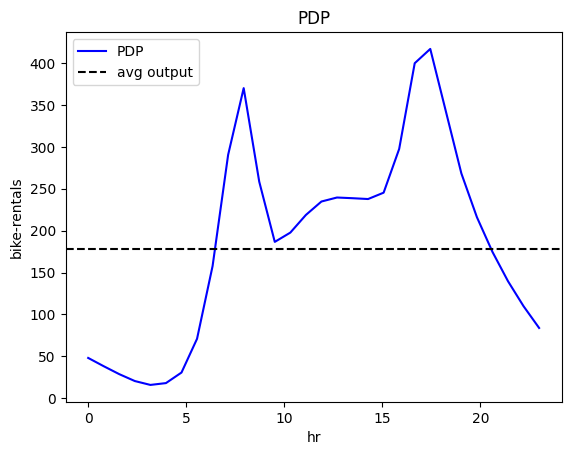

In [13]:
pdp.plot(feature=3, centering=True, scale_x=scale_x, scale_y=scale_y, show_avg_output=True)

### RHALE

In [14]:
rhale = effector.RHALE(data=X_train.to_numpy(), model=model_forward, model_jac=model_jac, feature_names=feature_names, target_name=target_name)

/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


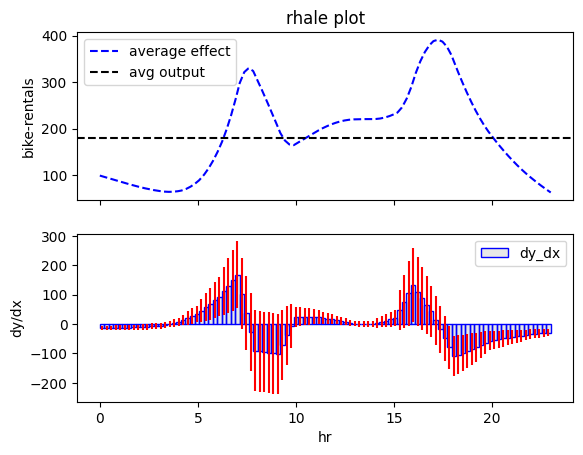

In [15]:
rhale.plot(feature=3, heterogeneity="std", centering=True, scale_x=scale_x, scale_y=scale_y, show_avg_output=True)

### Conclusion

The global effect of feature `hour` on the target variable `bike-rentals` shows two high peaks, one at around 8:00 and another at around 17:00, which probably corresponds to the morning and evening commute hours of the working days. However, the effect is quite heterogeneous. For this reason, we will analyze the regional effects which may explain the underlying heterogeneity.

## Regional Effect

### RegionalRHALE

In [16]:
# Regional RHALE
regional_rhale = effector.RegionalRHALE(
    data=X_train.to_numpy(),
    model=model_forward,
    model_jac=model_jac,
    cat_limit=10,
    feature_names=feature_names,
    nof_instances="all"
)

regional_rhale.fit(
    features=3,
    heter_small_enough=0.1,
    heter_pcg_drop_thres=0.2,
    binning_method=effector.binning_methods.Greedy(init_nof_bins=100, min_points_per_bin=100, discount=1., cat_limit=10),
    max_depth=2,
    nof_candidate_splits_for_numerical=10,
    min_points_per_subregion=10,
    candidate_conditioning_features="all",
    split_categorical_features=True,
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:25<00:00, 25.78s/it]


In [17]:
regional_rhale.summary(features=3, only_important=True, scale_x_list=scale_x_list)



Feature 3 - Full partition tree:
Node id: 0, name: hr, heter: 5.78 || nof_instances: 13903 || weight: 1.00
        Node id: 1, name: hr | workingday == 0.00, heter: 0.73 || nof_instances:  4385 || weight: 0.32
                Node id: 3, name: hr | workingday == 0.00 and yr == 1.00, heter: 0.93 || nof_instances:  2202 || weight: 0.16
                Node id: 4, name: hr | workingday == 0.00 and yr != 1.00, heter: 0.40 || nof_instances:  2183 || weight: 0.16
        Node id: 2, name: hr | workingday != 0.00, heter: 3.28 || nof_instances:  9518 || weight: 0.68
                Node id: 5, name: hr | workingday != 0.00 and yr == 1.00, heter: 3.02 || nof_instances:  4733 || weight: 0.34
                Node id: 6, name: hr | workingday != 0.00 and yr != 1.00, heter: 1.70 || nof_instances:  4785 || weight: 0.34
--------------------------------------------------
Feature 3 - Statistics per tree level:
Level 0, heter: 5.78
        Level 1, heter: 2.47 || heter drop : 3.31 (units), 57.20% (pcg

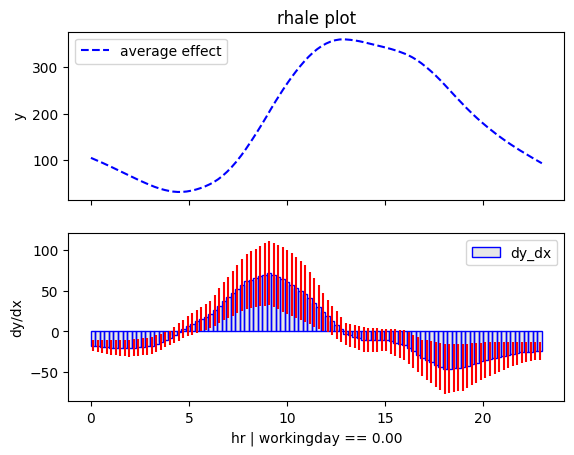

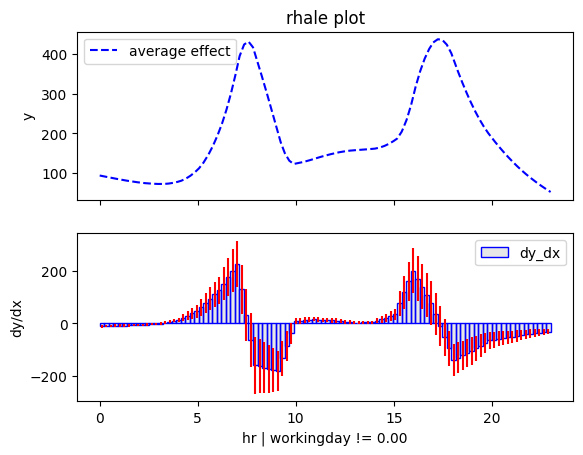

In [18]:
regional_rhale.plot(feature=3, node_idx=1, heterogeneity=True, centering=True, scale_x_list=scale_x_list, scale_y=scale_y)
regional_rhale.plot(feature=3, node_idx=2, heterogeneity=True, centering=True, scale_x_list=scale_x_list, scale_y=scale_y)

### RegionalPDP

In [19]:
regional_pdp = effector.RegionalPDP(
    data=X_train.to_numpy(),
    model=model_forward,
    cat_limit=10,
    feature_names=feature_names,
    nof_instances=1_000
)

regional_pdp.fit(
    features=3,
    heter_small_enough=0.1,
    heter_pcg_drop_thres=0.1,
    max_depth=2,
    nof_candidate_splits_for_numerical=5,
    min_points_per_subregion=10,
    candidate_conditioning_features="all",
    split_categorical_features=True,
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:19<00:00, 19.36s/it]


In [20]:
regional_pdp.summary(features=3, only_important=True, scale_x_list=scale_x_list)



Feature 3 - Full partition tree:
Node id: 0, name: hr, heter: 0.45 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: hr | workingday == 0.00, heter: 0.34 || nof_instances:   302 || weight: 0.30
                Node id: 3, name: hr | workingday == 0.00 and temp <= 0.50, heter: 0.19 || nof_instances:   157 || weight: 0.16
                Node id: 4, name: hr | workingday == 0.00 and temp > 0.50, heter: 0.22 || nof_instances:   145 || weight: 0.14
        Node id: 2, name: hr | workingday != 0.00, heter: 0.29 || nof_instances:   698 || weight: 0.70
                Node id: 5, name: hr | workingday != 0.00 and temp <= 0.50, heter: 0.22 || nof_instances:   305 || weight: 0.30
                Node id: 6, name: hr | workingday != 0.00 and temp > 0.50, heter: 0.21 || nof_instances:   393 || weight: 0.39
--------------------------------------------------
Feature 3 - Statistics per tree level:
Level 0, heter: 0.45
        Level 1, heter: 0.31 || heter drop : 0.14 (units), 31.79

In [21]:
y_limits=[-300, 800]

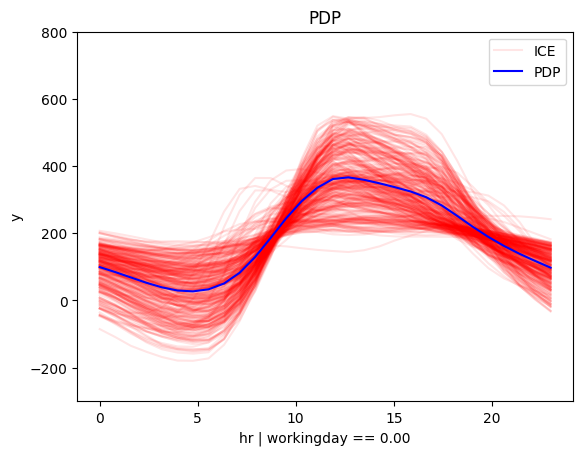

In [22]:
regional_pdp.plot(feature=3, node_idx=1, heterogeneity="ice", centering=True, scale_x_list=scale_x_list, scale_y=scale_y, y_limits=y_limits)

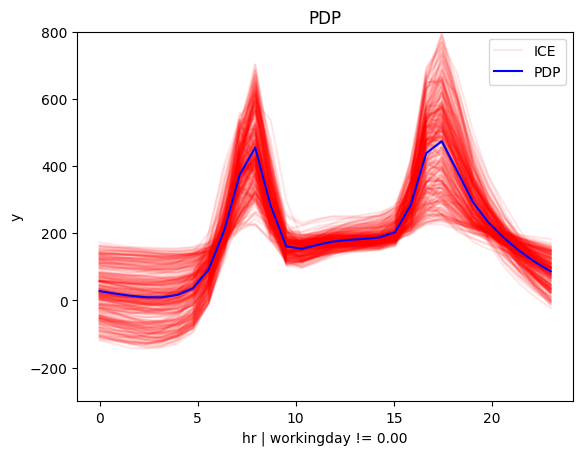

In [23]:
regional_pdp.plot(feature=3, node_idx=2, heterogeneity="ice", centering=True, scale_x_list=scale_x_list, scale_y=scale_y, y_limits=y_limits)

### Conclusion

The both PDP and RHALE regional effect reveal two distinct explanations; one for the working days and another for the non-working days. For the working days, the effect is quite similar to the global effect (unfortunately, working ways dominate our life), with two high peaks at around 8:00 and 17:00. However, for the non-working days, the effect is quite different, with a single high peak at around 13:00 which probably corresponds to sightseeing and leisure activities.

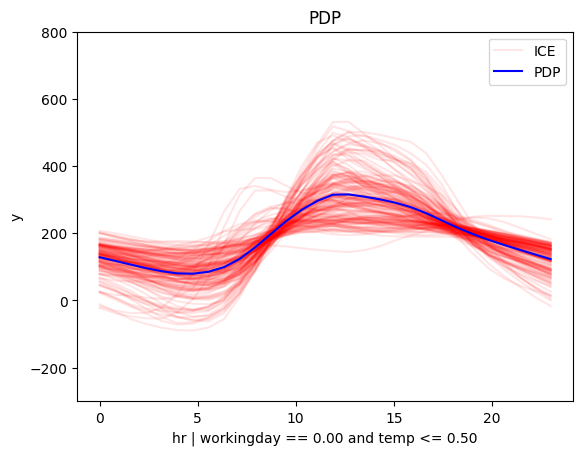

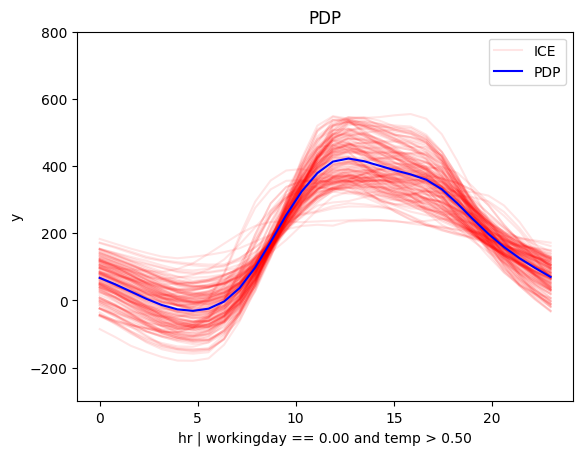

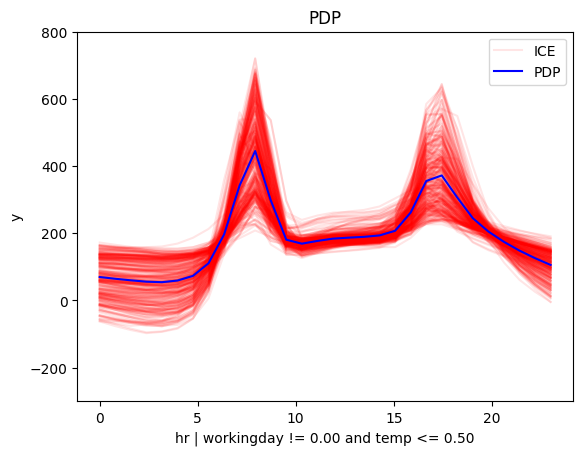

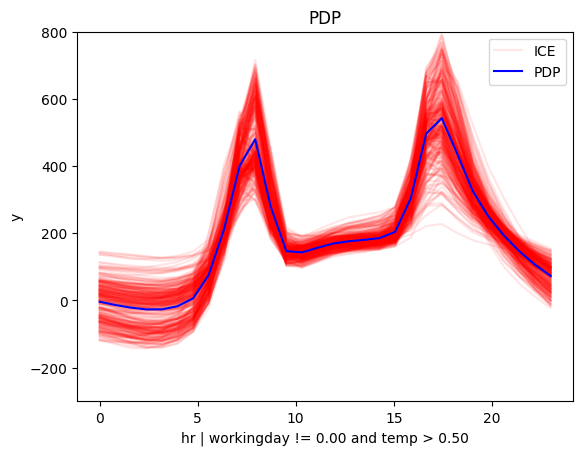

In [24]:
for node_idx in [3, 4, 5, 6]:
    regional_pdp.plot(feature=3, node_idx=node_idx, heterogeneity="ice", centering=True, scale_x_list=scale_x_list, scale_y=scale_y, y_limits=y_limits)